In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [2]:
file_path = Path("all_features.csv")
combined_df = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
combined_df.sort_index(inplace=True)

In [3]:
combined_df

,close,vol,spy,return,Beta,WR,RSI,OBV,sentiment_vader,sentiment_rnn,us2y10y,vix,usdjpy
date_time,,,,,,,,,,,,,
2021-01-28 09:30:00,290.000,719438,376.500,-0.159420,-5.021900,-3.846154,24.616808,1063543.0,-1.0,-1.0,91.536,30.21,104.36
2021-01-28 09:31:00,300.160,48204,376.780,0.035034,-4.692537,-100.000000,29.976045,1111747.0,1.0,1.0,91.536,30.17,104.33
2021-01-28 09:32:00,300.160,48204,376.760,0.000000,-4.693024,-82.237762,30.142002,1159951.0,0.0,0.0,91.536,30.24,104.31
2021-01-28 09:33:00,300.160,48204,377.040,0.000000,-4.658830,-82.237762,30.632934,1208155.0,0.0,0.0,91.706,29.96,104.30
2021-01-28 09:34:00,300.160,48204,376.830,0.000000,-4.686281,-82.237762,31.696730,1256359.0,0.0,0.0,91.875,29.75,104.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31 15:55:00,191.980,15778,396.345,-0.002447,2.943117,0.000000,70.208991,67647957.0,0.0,0.0,157.142,19.01,110.73
2021-03-31 15:56:00,191.960,13801,396.520,-0.000104,2.864469,-27.447552,63.737565,67634156.0,0.0,0.0,156.964,18.99,110.73
2021-03-31 15:57:00,191.951,21260,396.520,-0.000047,2.920564,-28.613054,60.113960,67612896.0,0.0,0.0,157.142,18.97,110.73


In [4]:
combined_df['target_price'] = combined_df['close'].shift(-1)
#combined_df['target_return'] = combined_df['return'].shift(-1)
combined_df = combined_df.dropna()

In [5]:
combined_df

,close,vol,spy,return,Beta,WR,RSI,OBV,sentiment_vader,sentiment_rnn,us2y10y,vix,usdjpy,target_price
date_time,,,,,,,,,,,,,,
2021-01-28 09:30:00,290.000,719438,376.500,-0.159420,-5.021900,-3.846154,24.616808,1063543.0,-1.0,-1.0,91.536,30.21,104.36,300.160
2021-01-28 09:31:00,300.160,48204,376.780,0.035034,-4.692537,-100.000000,29.976045,1111747.0,1.0,1.0,91.536,30.17,104.33,300.160
2021-01-28 09:32:00,300.160,48204,376.760,0.000000,-4.693024,-82.237762,30.142002,1159951.0,0.0,0.0,91.536,30.24,104.31,300.160
2021-01-28 09:33:00,300.160,48204,377.040,0.000000,-4.658830,-82.237762,30.632934,1208155.0,0.0,0.0,91.706,29.96,104.30,300.160
2021-01-28 09:34:00,300.160,48204,376.830,0.000000,-4.686281,-82.237762,31.696730,1256359.0,0.0,0.0,91.875,29.75,104.31,300.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31 15:54:00,192.451,19272,396.600,0.001306,2.914251,-9.956367,72.658641,67663735.0,0.0,0.0,157.321,18.89,110.75,191.980
2021-03-31 15:55:00,191.980,15778,396.345,-0.002447,2.943117,0.000000,70.208991,67647957.0,0.0,0.0,157.142,19.01,110.73,191.960
2021-03-31 15:56:00,191.960,13801,396.520,-0.000104,2.864469,-27.447552,63.737565,67634156.0,0.0,0.0,156.964,18.99,110.73,191.951


In [6]:
X = combined_df[['return', 'Beta', 'WR', 'RSI', 'OBV', 'sentiment_vader', 'sentiment_rnn', 'us2y10y', 'vix', 'usdjpy']]

In [7]:
target = combined_df.iloc[:,13]

In [8]:
y = target.values.reshape(-1, 1)

In [9]:
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [10]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.75,
    max_depth=3, random_state=0, loss='ls').fit(X_train, y_train.ravel())

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(X_test))

0.044050512116467516

In [14]:
y_pred = model.predict(X_test)

In [15]:
predicted_value = scaler.inverse_transform(y_pred.reshape(-1,1))
real_value = scaler.inverse_transform(y_test)

In [16]:
output = pd.DataFrame({
    "Real": real_value.ravel(),
    "Predicted": predicted_value.ravel()
    }, index = combined_df.index[-len(real_value): ])
output.head()

,Real,Predicted
date_time,,
2021-03-12 14:41:00,274.890,273.669153
2021-03-12 14:42:00,275.196,274.164568
2021-03-12 14:43:00,276.027,275.274396
2021-03-12 14:44:00,277.130,276.279977
2021-03-12 14:45:00,278.156,274.330777


<AxesSubplot:xlabel='date_time'>

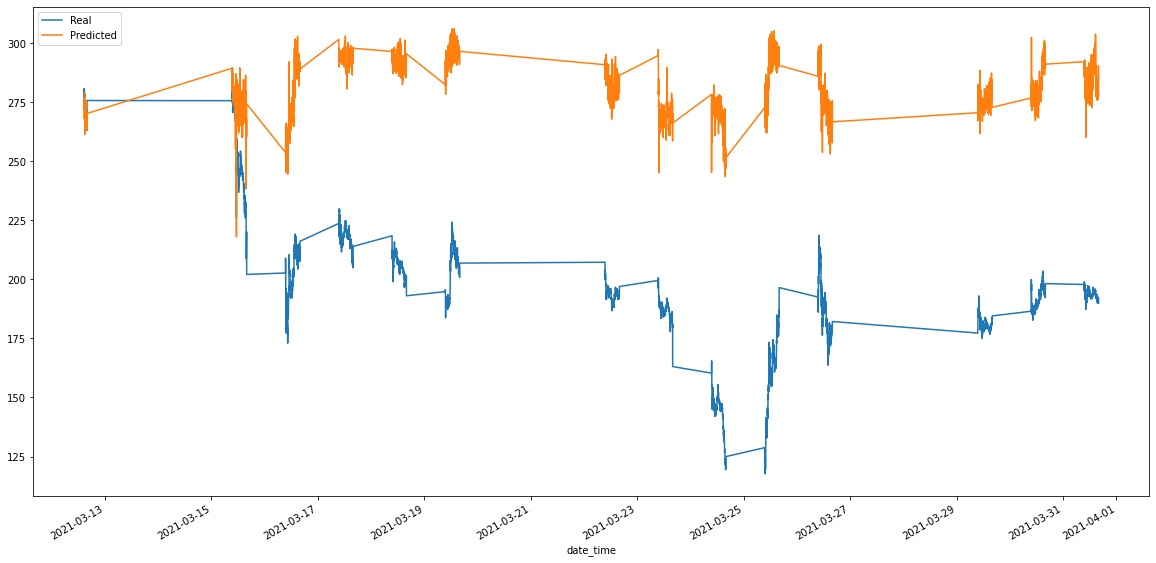

In [18]:
output.plot(figsize = (20,10))